# Tech Challenge - Fase 01

A descrição do desafio está dentro do arquivo [README.md](README.md).

### TODO

- Vídeo explicativo
- Aplicação Streamlit para simulação da predição

### Bibliotecas

Lista das bibliotecas utilizadas para o projeto.

### Vídeo explicativo

Abaixo o link do vídeo onde o grupo explica o desenvolvimento do desafio.

`COLOCAR O LINK AQUI`

In [62]:
# Para carregar e manipular os dados
import pandas as pd
import numpy as np

# Para treinamento dos modelos
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Para validação dos modelos
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Para transformação dos dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define configurações dos gráficos

plt.style.use('ggplot')
sns.set_style('darkgrid')

### Obtenção dos dados

Foi feito uma pesquisa e encontramos um conjunto de dados de dados de [seguro de saúde](https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41).

O arquivo foi salvo em [dados/insurance.csv](dados/insurance.csv).


### Análise exploratória dos dados

Dicionário de dados:

- **age**: Variável que representa a idade da pessoa.
- **sex**: Variável que representa o gênero da pessoa (Masculino ou Feminino).
- **bmi**: Variável que representa o índice de massa corpórea (IMC) da pessoa.
- **children**: Variável que representa a quantidade de filhos que a pessoa tem e que são cobertos pelo plano de saúde.
- **smoker**: Variável que representa se a pessoa é fumante (Sim / Não).
- **region**: Variável que representa a região onde a pessoa mora.
- **charges**: Variável que representa o custo médico individual do plano.

In [63]:
# Carrega os dados
df = pd.read_csv('dados/insurance.csv')

# Lista das primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


O Dataset contém 1338 linhas e 7 colunas (variáveis).

In [64]:
# Verifica as dimensões do dataset
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 1338
Colunas: 7


O dataset possui colunas que precisam ser convertidas para números, como:
- sex (variável do tipo inteiro)
- smoker (variável do tipo object)
- region (variável do tipo object)

In [65]:
# Verifica os tipos das colunas
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Conforme o resultado abaixo, não há dados ausentes.

In [66]:
# Verifica se ha dados ausentes
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [67]:
# Verifica os valores distintos de cada variável
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [68]:
# Verifica as informações do dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


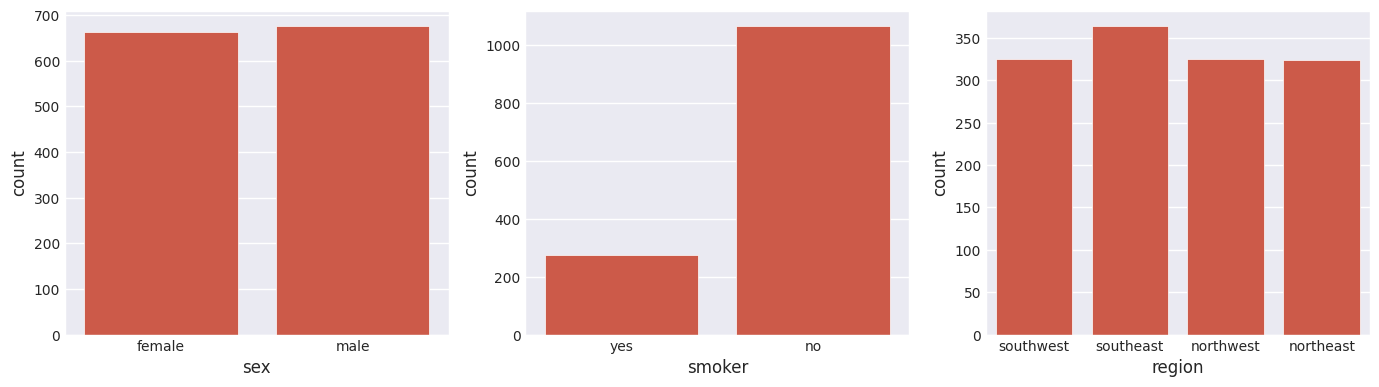

In [69]:
# Analise dos campos quantitativos
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)

plt.show()

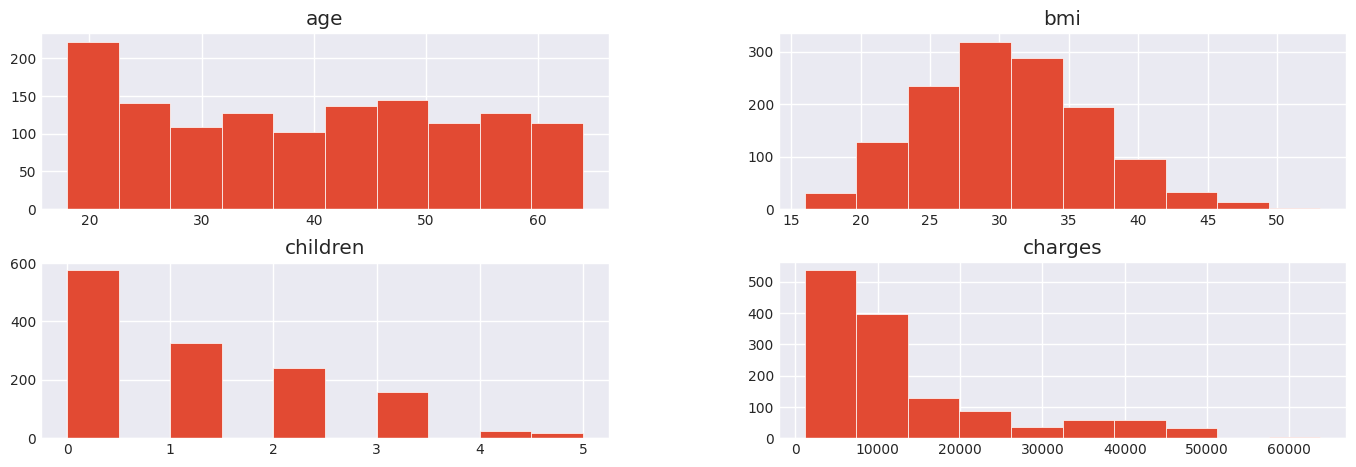

In [70]:
# Analise dos campos qualitativos

df.hist(figsize=(15, 5))
plt.show()

Avaliação preeliminar:

Fumantes vs Não Fumantes: O impacto do tabagismo nos custos de saúde é evidente, com os fumantes apresentando custos médios muito mais elevados. Isso destaca como o tabagismo pode ser um importante fator de risco, aumentando significativamente os encargos médicos.

Sexo: Não há uma diferença clara nos custos de saúde entre homens e mulheres, indicando que ambos têm riscos semelhantes que afetam seus custos de saúde de forma equilibrada.

Região: A localização geográfica tem um impacto limitado nos custos de saúde, com uma distribuição bastante uniforme entre as diferentes regiões. A exceção parece ser a região "southeast", que tem mais outliers.

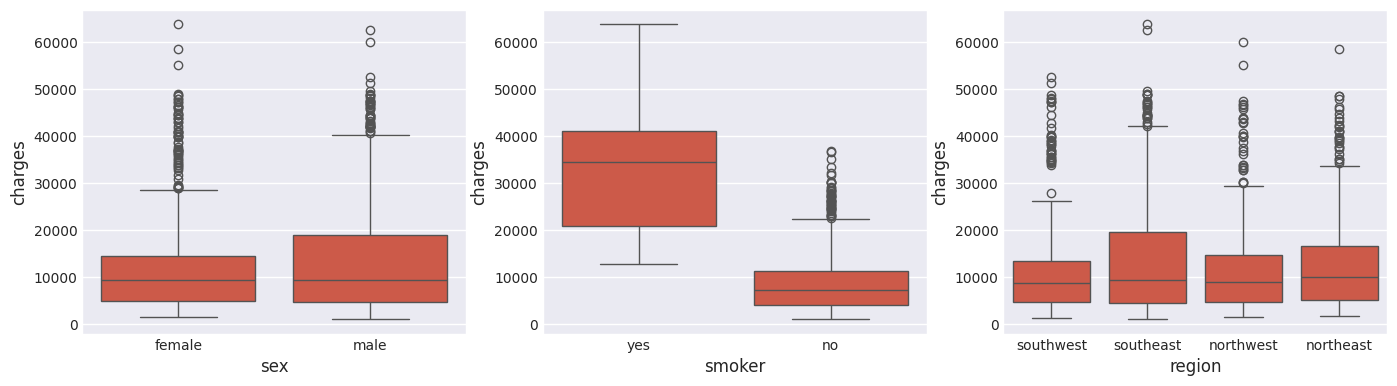

In [71]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)

plt.show()

Avaliação preeliminar:

A variável "charges" possui muitos outliers, o que pode ser indicativo de altos custos associados a uma pequena parte da população, possivelmente por problemas de saúde ou maior frequência de uso dos serviços.

A variável "bmi" mostra um padrão de sobrepeso/obesidade na amostra, o que pode estar relacionado aos custos elevados de saúde.

A distribuição da idade é razoavelmente simétrica, com a maior parte da população entre 30 e 50 anos, uma faixa etária geralmente ativa.


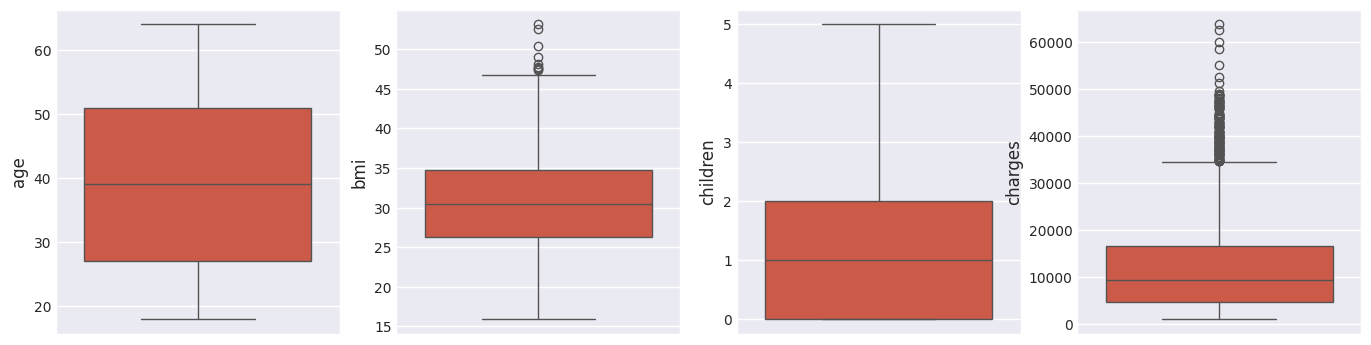

In [75]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.boxplot(y='age', data=df)

plt.subplot(1, 4, 2)
sns.boxplot(y='bmi', data=df)

plt.subplot(1, 4, 3)
sns.boxplot(y='children', data=df)

plt.subplot(1, 4, 4)
sns.boxplot(y='charges', data=df)

plt.show()

In [74]:
# TODO: Verificar se iremos remover outliers

Análise da matriz de correlação

Até o momento, não há relação entre as colunas

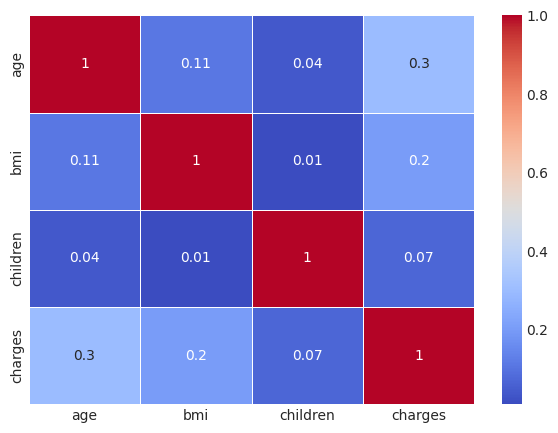

In [46]:
# Matriz de correlação
numeric_columns = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_columns].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.show()

Transformando os dados categóricos para numéricos

In [49]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [51]:
# Converte a variável region para valores numéricos através da técnica OneHotEncoding
one_hot_region = OneHotEncoder(sparse_output=False)
region_encoded = one_hot_region.fit_transform(df[['region']])
df = pd.concat([df, pd.DataFrame(data=region_encoded, columns=one_hot_region.get_feature_names_out())], axis=1)
df.drop(columns=['region'], axis=1, inplace=True)

Análise da matriz de correlação após a transformação dos campos de sex e smoker

A princípio, há relação entre a variável de smoker e do valor das cobranças do seguro

Avaliação preeliminar:

Tabagismo é o principal fator associado ao aumento dos custos de saúde. A forte correlação entre "smoker" e "charges" sugere que políticas de saúde pública voltadas para a redução do tabagismo podem ter um impacto significativo na redução dos custos médicos.

Idade e BMI também estão correlacionados com custos de saúde, mas com menos intensidade. Isso indica que tanto o envelhecimento quanto o aumento do índice de massa corporal influenciam os custos médicos, mas de forma mais suave em comparação ao tabagismo.

As variáveis regionais e o número de filhos não parecem ter um impacto significativo nos custos de saúde.

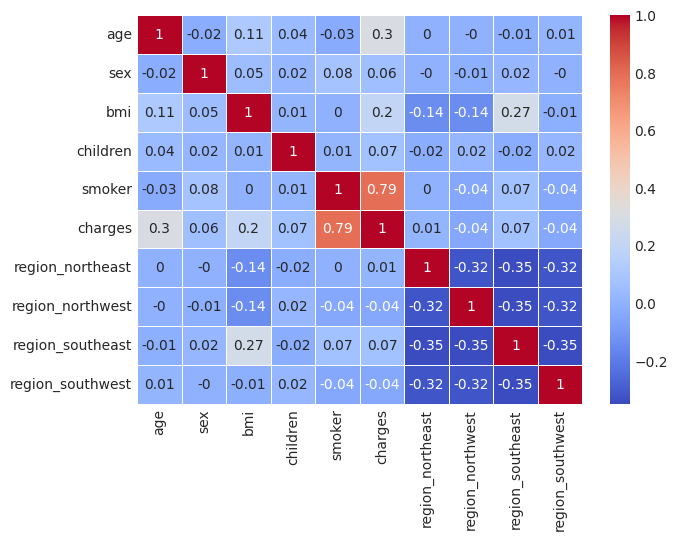

In [60]:
# Matriz de correlação
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.show()